<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [19]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head(10)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




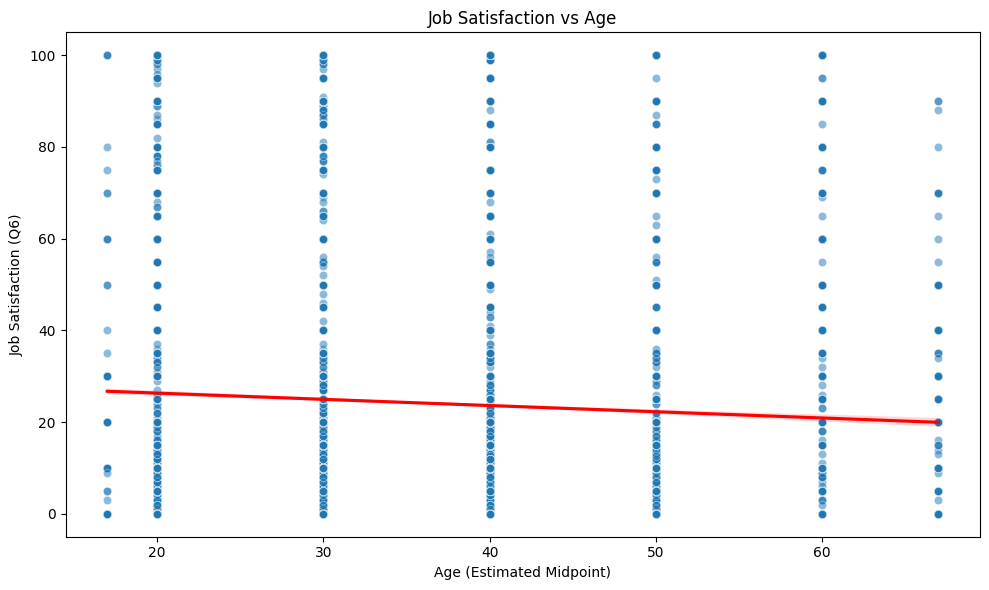

In [10]:
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 67
}

df['AgeNumeric'] = df['Age'].map(age_map)



# Prepare the data
age_satisfaction = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Plot with scatter and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_satisfaction, x='AgeNumeric', y='JobSatPoints_6', alpha=0.5)
sns.regplot(data=age_satisfaction, x='AgeNumeric', y='JobSatPoints_6', scatter=False, color='red')

plt.title('Job Satisfaction vs Age')
plt.xlabel('Age (Estimated Midpoint)')
plt.ylabel('Job Satisfaction (Q6)')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


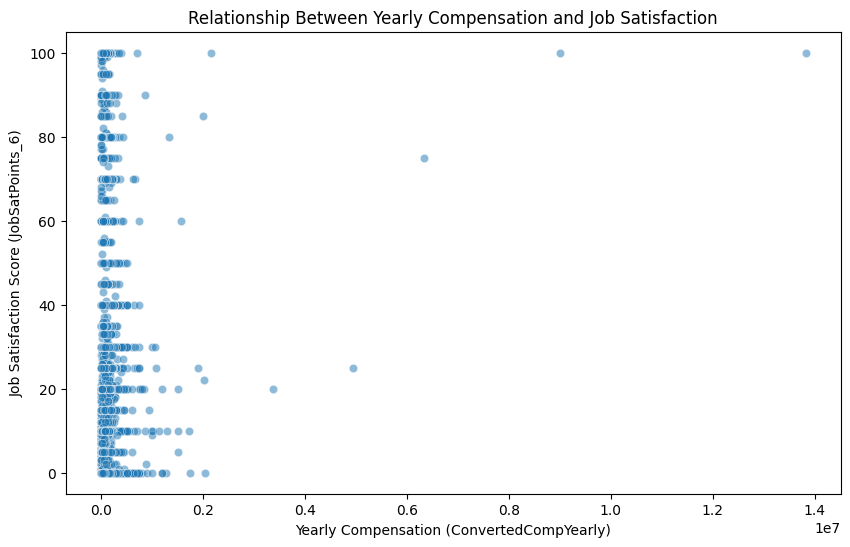

In [17]:
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

plt.figure(figsize=(10,6))

sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df_clean, alpha=0.5)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.title('Relationship Between Yearly Compensation and Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


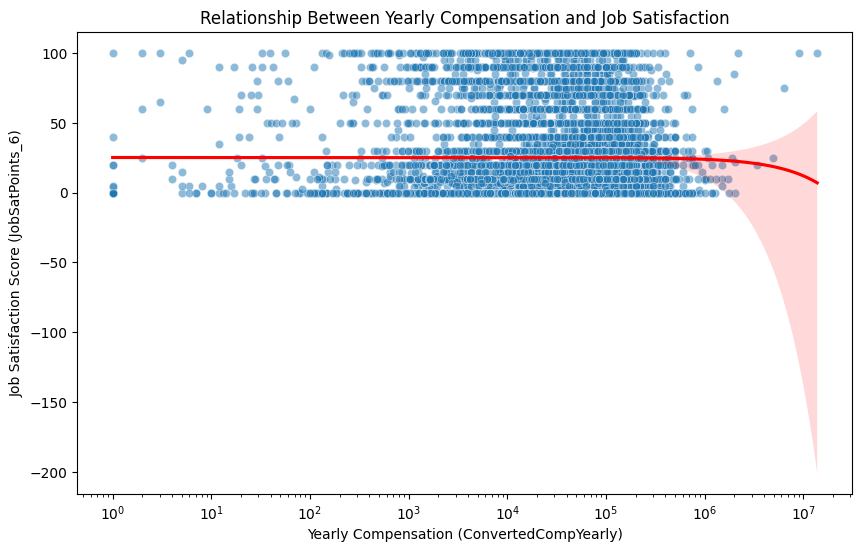

In [18]:
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

plt.figure(figsize=(10,6))

sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df_clean, alpha=0.5)

sns.regplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df_clean, scatter=False, color='red')

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.title('Relationship Between Yearly Compensation and Job Satisfaction')
plt.xscale('log')  
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


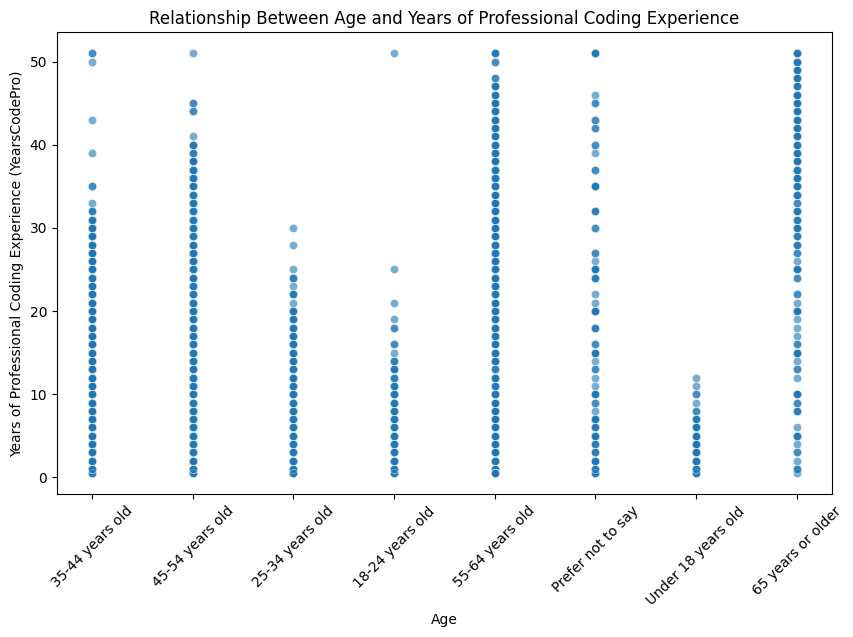

In [22]:
def convert_years_experience(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        if x.lower() == 'less than 1 year':
            return 0.5
        elif x.lower() == 'more than 50 years':
            return 51
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

# Clean and convert columns
df_clean = df.dropna(subset=['Age', 'YearsCodePro']).copy()
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_years_experience)

df_clean = df_clean.dropna(subset=['YearsCodePro'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='YearsCodePro', data=df_clean, alpha=0.6)
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Years of Professional Coding Experience (YearsCodePro)')
plt.title('Relationship Between Age and Years of Professional Coding Experience')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [ ]:
## Write your code here

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


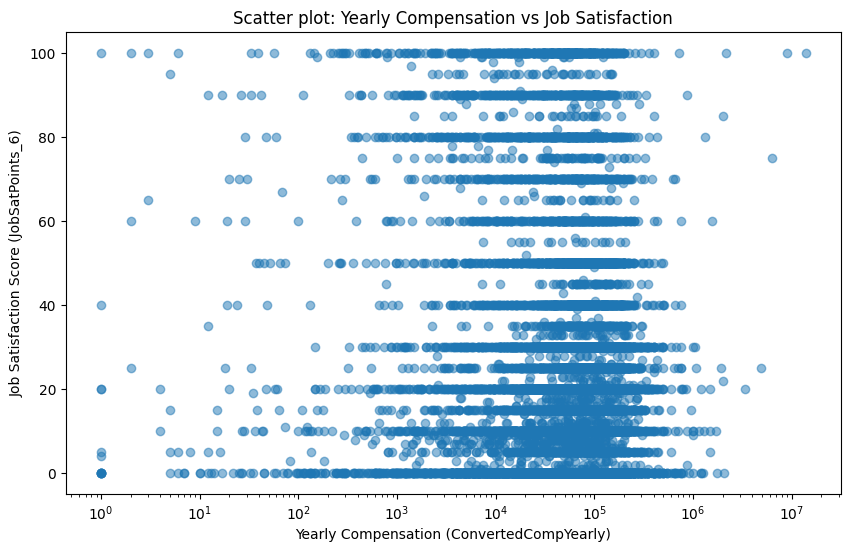

In [28]:
import matplotlib.pyplot as plt

df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSatPoints_6'], alpha=0.5)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.title('Scatter plot: Yearly Compensation vs Job Satisfaction')
plt.xscale('log') 
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


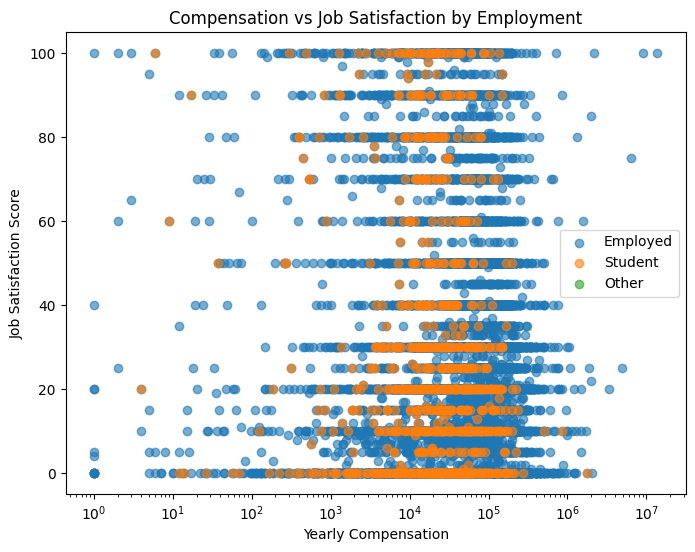

In [ ]:
import matplotlib.pyplot as plt

data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])
data = data[data['ConvertedCompYearly'] > 0]

employed = data[data['Employment'].str.contains('Employed', case=False, na=False)]
student = data[data['Employment'].str.contains('Student', case=False, na=False)]
other = data[~data.index.isin(employed.index) & ~data.index.isin(student.index)]

plt.figure(figsize=(8,6))
plt.scatter(employed['ConvertedCompYearly'], employed['JobSatPoints_6'], label='Employed', alpha=0.6)
plt.scatter(student['ConvertedCompYearly'], student['JobSatPoints_6'], label='Student', alpha=0.6)
plt.scatter(other['ConvertedCompYearly'], other['JobSatPoints_6'], label='Other', alpha=0.6)

plt.xscale('log')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Score')
plt.title('Compensation vs Job Satisfaction by Employment')
plt.legend()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
# Put your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
